In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
from tabulate import tabulate

In [5]:
MODEL_PATH = 'history_toy_batch_64_base/'

In [9]:
def load_exp(exp):
    history_path = os.path.join(MODEL_PATH_20, exp)
    loss = np.load(os.path.join(history_path, 'loss.npy'))
    coords = np.load(os.path.join(history_path, 'coords.npy'))
    coords = np.cumsum(coords)
    return {
        "name": exp,
        "loss": loss,
        "coords": coords,
    }

In [121]:
EXPS = [f.path[len(MODEL_PATH):] for f in os.scandir(MODEL_PATH) if f.is_dir()]

experiments = [load_exp(exp) for exp in EXPS]

experiments.sort(key=lambda exp : exp['loss'][-1])

table = [
    ["compression", "transmitted coordinates"],
    *[
        [exp['name'], exp['coords'][-1]]
        for exp in experiments
    ]
]
print(tabulate(table))

---------------------  -----------------------
compression            transmitted coordinates
MultiplicationPenalty  111623876
BanLastM               111623876
SubtractionPenalty     111623876
ExpSmoothing           111623876
None                   108263960
RandK                  111623876
---------------------  -----------------------


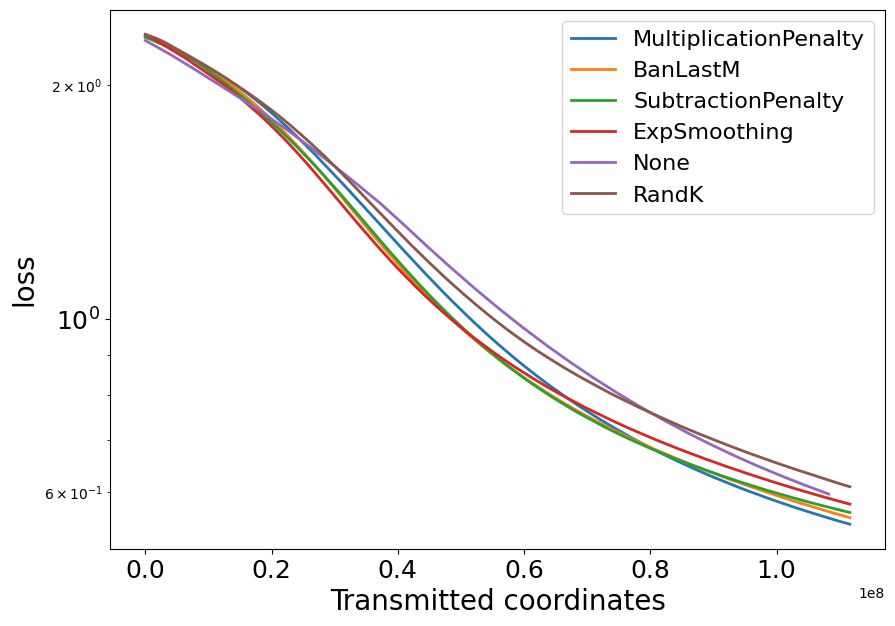

In [122]:
plt.figure(figsize=(10, 7))

for exp in experiments:
    plt.semilogy(
        exp['coords'],
        exp['loss'],
        label=exp['name'],
        linewidth=2
    )

plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Transmitted coordinates", fontsize=20)
plt.ylabel("loss", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

In [7]:
MODEL_PATH_20 = '20_history_toy_batch_64_base/'

In [13]:
EXPS = [f.path[len(MODEL_PATH_20):] for f in os.scandir(MODEL_PATH_20) if f.is_dir()]

experiments = [load_exp(exp) for exp in EXPS]

experiments.sort(key=lambda exp : exp['loss'][-1])

table = [
    ["compression", "transmitted coordinates"],
    *[
        [exp['name'], exp['coords'][-1]]
        for exp in experiments
    ]
]
print(tabulate(table))

---------------------  -----------------------
compression            transmitted coordinates
None                   216391910
BanLastM               223107521
ExpSmoothing           223107521
SubtractionPenalty     223107521
MultiplicationPenalty  223107521
RandK                  223107521
---------------------  -----------------------


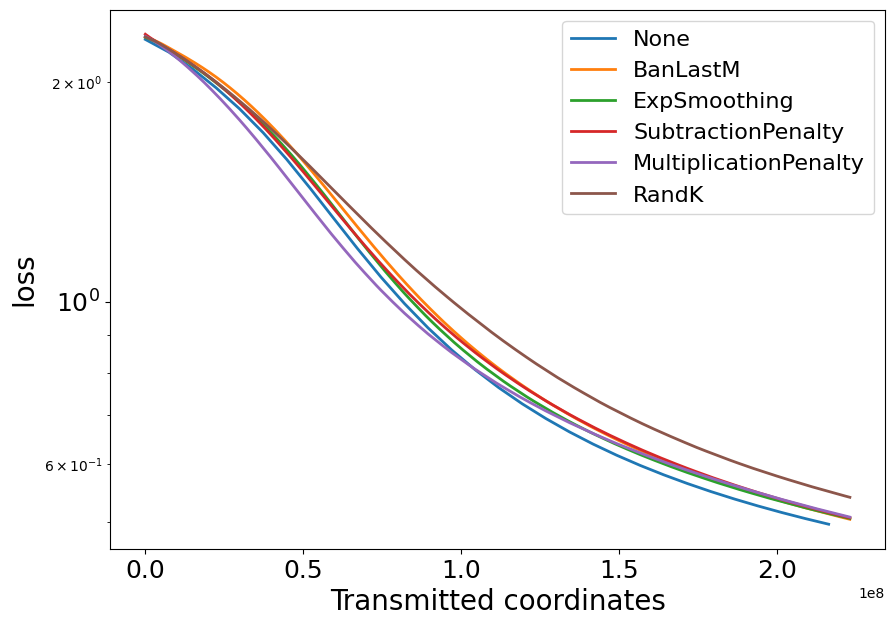

In [14]:
plt.figure(figsize=(10, 7))

for exp in experiments:
    plt.semilogy(
        exp['coords'],
        exp['loss'],
        label=exp['name'],
        linewidth=2
    )

plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Transmitted coordinates", fontsize=20)
plt.ylabel("loss", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)